# Task 1

In [31]:

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix


import torch
import torch.optim as optim
from torch.utils.data import DataLoader

In [32]:
def construct_X(M, alphas, Np = None):
    if Np is None:
        Np = int(np.ceil(np.sqrt(2) * M))
    i_indices = []
    j_indices = []
    weights = []

    N = len(alphas) * Np
    D = M * M
    X = scipy.sparse.coo_matrix((weights, (i_indices, j_indices)), shape=(N, D), dtype = numpy.float32),

    return X

In [42]:
def construct_X(M, alphas, Np=None):
    if Np is None:
        Np = int(np.ceil(np.sqrt(2) * M))
    
    h = 1  # Pixel distance
    x = np.linspace(-(M-1)/2, (M-1)/2, M)
    y = np.linspace(-(M-1)/2, (M-1)/2, M)
    Cx, Cy = np.meshgrid(x, y)
    C = np.vstack([Cx.ravel(), Cy.ravel()])
    
    i_indices = []
    j_indices = []
    weights = []
    
    for alpha in alphas:
        theta = np.deg2rad(alpha)
        R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        p = R @ C
        p[0, :] += (Np-1) / 2
        
        for j in range(C.shape[1]):
            pj = p[:, j]
            sensor_idx = int(np.floor(pj[0]))
            if 0 <= sensor_idx < Np-1:
                i_indices.append(sensor_idx)
                j_indices.append(j)
                weights.append(1 - (pj[0] - sensor_idx))
                
                i_indices.append(sensor_idx + 1)
                j_indices.append(j)
                weights.append(pj[0] - sensor_idx)
    
    X = coo_matrix((weights, (i_indices, j_indices)), shape=(len(alphas) * Np, M * M), dtype=np.float32)
    return X

In [43]:
directory = 'hs_tomography'

# M = 77 for small dataset 195 for bigger dataset
M = 77

# load the dataset
file_name_alpha = 'alphas_'+str(M)+'.npy'
file_name_y = 'y_'+str(M)+'.npy'

data_alpha = np.load(os.path.join(directory, file_name_alpha))
data_y = np.load(os.path.join(directory, file_name_y))
print("The shape of alpha: ", data_alpha.shape,'\n', "The shape of y:", data_y.shape)


# call function to construct X
X = construct_X(M, data_alpha, Np = None)

print(X)

The shape of alpha:  (90,) 
 The shape of y: (9810,)
  (15, 0)	0.6574039
  (16, 0)	0.34259614
  (15, 1)	0.63995147
  (16, 1)	0.36004853
  (15, 2)	0.62249905
  (16, 2)	0.37750095
  (15, 3)	0.60504663
  (16, 3)	0.39495337
  (15, 4)	0.5875942
  (16, 4)	0.41240576
  (15, 5)	0.57014185
  (16, 5)	0.42985818
  (15, 6)	0.55268943
  (16, 6)	0.44731057
  (15, 7)	0.535237
  (16, 7)	0.464763
  (15, 8)	0.5177846
  (16, 8)	0.4822154
  (15, 9)	0.5003322
  (16, 9)	0.4996678
  (15, 10)	0.4828798
  (16, 10)	0.5171202
  (15, 11)	0.4654274
  (16, 11)	0.5345726
  (15, 12)	0.44797498
  :	:
  (17, 5916)	0.45955014
  (16, 5917)	0.52299744
  (17, 5917)	0.47700256
  (16, 5918)	0.505545
  (17, 5918)	0.49445495
  (16, 5919)	0.48809263
  (17, 5919)	0.5119074
  (16, 5920)	0.4706402
  (17, 5920)	0.52935976
  (16, 5921)	0.45318782
  (17, 5921)	0.5468122
  (16, 5922)	0.4357354
  (17, 5922)	0.5642646
  (16, 5923)	0.41828302
  (17, 5923)	0.581717
  (16, 5924)	0.4008306
  (17, 5924)	0.5991694
  (16, 5925)	0.38337818
  (1

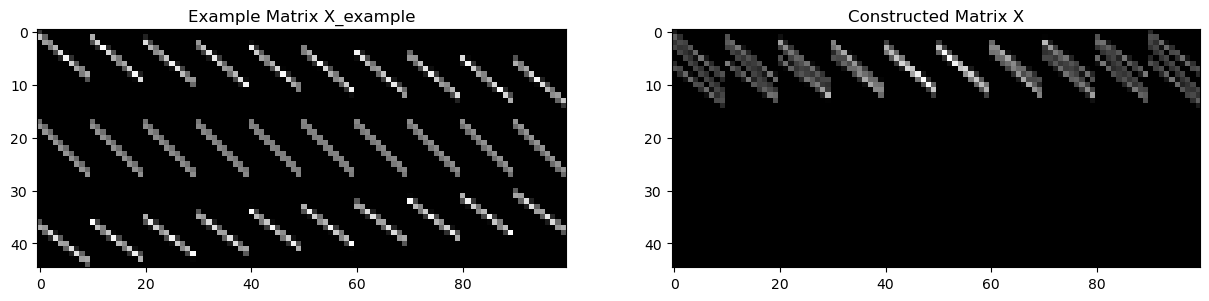

In [46]:
# Construct the matrix for the given parameters
#M = 10
#alphas = [-33, 1, 42]
#X = construct_X(M, alphas)

X_example = np.load('hs_tomography/X_example.npy')

# Convert sparse matrix X to dense format
X_dense = X.toarray()

# Visualize both matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(X_example, cmap='gray')
axes[0].set_title('Example Matrix X_example')

axes[1].imshow(X_dense, cmap='gray')
axes[1].set_title('Constructed Matrix X')

plt.show()